(1599, 12)
Train shape: (1279, 11)
Test shape: (320, 11)

Performance del modello RandomForestRegressor:
RMSE: 0.55
R2 score: 0.54


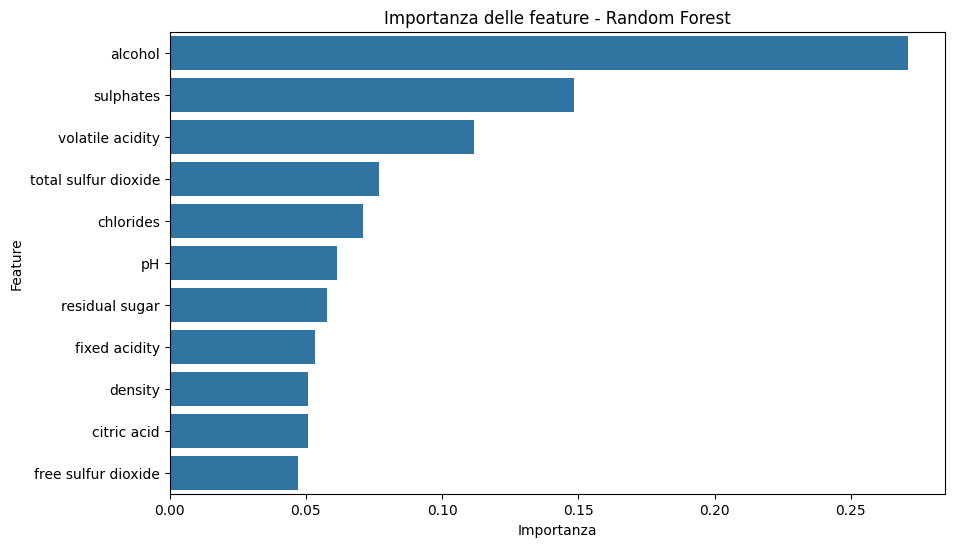

In [3]:
# Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerie ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Carico i dati
df_red = pd.read_csv('../data/winequality-red.csv', sep=';')

# Info rapida
print(df_red.shape)
df_red.head()

# Separazione X e y
X = df_red.drop('quality', axis=1)
y = df_red['quality']

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Creazione modello
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Addestramento
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# Valutazione
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance del modello RandomForestRegressor:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")

# Importanza delle feature
importances = model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot importanza
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Importanza delle feature - Random Forest")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.show()
